<a href="https://colab.research.google.com/github/jjiguaran/text_mining/blob/master/individual_versions/Topics_noticias_reddit_edgar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Importar librerias
import pandas as pd


In [105]:
#Importar los datasets
url_reddit = 'https://raw.githubusercontent.com/jjiguaran/text_mining/master/Data/RedditNews.csv'
url_combined = 'https://raw.githubusercontent.com/jjiguaran/text_mining/master/Data/Combined_News_DJIA.csv'
RedditNews = pd.read_csv(url_reddit)
CombinedNews = pd.read_csv(url_combined)


RedditNews['Date'] =  pd.to_datetime(RedditNews['Date'], format='%Y-%m-%d')
CombinedNews['Date'] =  pd.to_datetime(CombinedNews['Date'], format='%Y-%m-%d')


In [106]:
# Exploramos redditnews
RedditNews.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [107]:
# Exploramos combinedNews
CombinedNews.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

Comparar los días con noticias entre datasets

In [108]:
## Nos quedamos con las fechas del dataset que está etiquetado
RedditNews = RedditNews[RedditNews['Date'].isin(CombinedNews['Date'])]

print(
    CombinedNews['Date'].nunique(),
    RedditNews['Date'].nunique() )

1989 1989


Analizar la distribución de clases

Analizar cantidad de noticias, pueden haber días sin el todo el top 25

Limpieza de los datos

In [109]:
## Hay error en la codificación de caracteres especiales, encontré ese, pero hay que ver que otros surgen
index_review = RedditNews[RedditNews['News'].str.contains('&amp;')].index
display(RedditNews[RedditNews['News'].str.contains(' us ')])
RedditNews['News'] = RedditNews['News'].str.replace('&amp;', '&')

,Date,News
24,2016-07-01,Ozone layer hole seems to be healing - US &amp...
37,2016-06-30,Japan's top court has approved blanket surveil...
204,2016-06-23,"Erdoan: Europe, you dont want us because were ..."
376,2016-06-16,Germany to end unofficial tolerance of polygam...
1762,2016-04-22,'Kindly send us names and quotes insulting our...
...,...,...
70187,2008-10-22,"b'Despite intense U.S. pressure, Pakistan refu..."
70379,2008-10-15,b'What does the rehabilitation of Bill Ayers t...
71185,2008-09-12,"b'Putin on Georgia: ""What did you want us to d..."
71830,2008-08-18,b'Putin has given us an order that everyone mu...


In [116]:
## Hay error en la codificación de caracteres especiales, encontré ese, pero hay que ver que otros surgen
RedditNews['News'] = RedditNews['News'].str.replace("year.old", " year old ", regex=True)
RedditNews['News'] = RedditNews['News'].str.replace("\d year", " year ", regex=True)
RedditNews['News'] = RedditNews['News'].str.replace("year old", "years old", regex=True)
RedditNews['News'] = RedditNews['News'].str.replace("years.old", " years old ", regex=True)
RedditNews['News'] = RedditNews['News'].str.replace("\d years", " years ", regex=True)
## Hay error en la codificación de caracteres especiales, encontré ese, pero hay que ver que otros surgen
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words("english")
REPLACE_BY_SPACE_RE = re.compile('[(){}\[\]\|@,;-]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z ^#\+_]')
SEP_NUMBER = re.compile('(?<=\d)\,')
USA_ABREV = re.compile('U\.S|u\.s\|u\.s\.a\.|US')
DOT_ABREV = re.compile('\.(?![a-zA-Z]{2})')
STARTING_B = re.compile("^\"b' |^b ")
MONEY = re.compile("\$[0-9]+")
BILLION = re.compile("\$[0-9]+B|[0-9]{10}")
MILLION = re.compile("(?i)\$[0-9]+m|[0-9]{7}|[0-9]+m")
NKOREA = re.compile("(?i)north kore[a-z]+")
SKOREA = re.compile("(?i)south kore[a-z]+")

STOPWORDS = stopwords.words('english')
pd.options.display.max_colwidth = 150
def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
#     test = re.sub(r'[0-9]+bn',r'\$[0-9]+_billion',text)
    text = text.replace("USD", "dollars")
    text = text.replace('years old', ' years_old ')

    text = text.replace('yrs', ' years ')

    text = USA_ABREV.sub(' usa ', text) # replace U.S U.S. u.s US for usa
    text = text.lower() # lowercase text
    text = text.replace("al-qaeda", "alqaeda")
    text = text.replace("al-qa'eda", "alqaeda")
    text = text.replace("al-quds", "alquds")
    text = text.replace('&amp;', '&')
    text = text.replace('&', '')
    
    text = text.replace("dollar ", " money ")
    text = text.replace("dollars ", " money ")
    text = text.replace("usd", " money ")
    text = text.replace("$", " money ")
    
    text = NKOREA.sub(' north_korea ', text) 
    text = SKOREA.sub(' south_korea ', text)
    text = MONEY.sub(' money ', text) # removes abrevetion dot, ej: L.G.B.T  = LGBT
    text = DOT_ABREV.sub('', text) # removes abrevetion dot, ej: L.G.B.T  = LGBT
    text = SEP_NUMBER.sub('', text) # removes . and , seprating numbers
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = STARTING_B.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = BILLION.sub(' billion ', text) 
    text = MILLION.sub(' million ', text) 
    text = text.replace('bln ', ' billion ')

    text = text.replace('bn ', ' billion ')
    text = text.replace('millions', ' million ')
    text = text.replace('billions', ' billion ')

#     test = re.sub(r'[0-9]+bn',r'\$[0-9]+_billion',text) :(

    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    text = text.strip()
    return text
    
RedditNews['News_cleaned'] = RedditNews['News'].apply(clean_text)


In [117]:
RedditNews[RedditNews['News'].str.contains("\$")].sample(n=10,random_state=232)

,Date,News,News_cleaned
5809,2015-11-11,Germany's refugee bill to top $22 billion,germany refugee bill top money 22 billion
23114,2013-12-19,"Private foundation pays over $500,000 to buy disputed Native American religious relics at auction and return them to Hopi, Apace tribes.",private foundation pays money 500000 buy disputed native american religious relics auction return hopi apace tribes
24588,2013-10-21,"5 $33,000 a year for every adult guaranteed $66,000 per couple base income - Switzerland referendum after hearing how much CEO's get payed compare...",5 money 33000 year every adult guaranteed money 66000 per couple base income switzerland referendum hearing much ceo get payed compared workers
39382,2012-03-08,Cameroon elephant slaughter: Park cannot cope with $2 million anti-poaching budget when ivory is $1000-$1500 per kg in Asia with each tusk weighin...,cameroon elephant slaughter park cannot cope money 2 million anti poaching budget ivory money 1000 money 1500 per kg asia tusk weighing 10kg
18388,2014-06-26,Chinas commodity-lending fraud just got $15 billion bigger - Discovers fraudulent loans backed by gold stocks that dont exist.,chinas commodity lending fraud got money 15 billion bigger discovers fraudulent loans backed gold stocks dont exist
14732,2014-11-19,Turkey: RedHack deletes $670K in electric bills,turkey redhack deletes money 670k electric bills
42871,2011-10-21,India sixth largest contributor to global wealth -- \r\nReport: Indias total wealth rose by $1.3 trillion to reach $4.1 trillion in 2011; expected...,india sixth largest contributor global wealth report indias total wealth rose money 13 trillion reach money 41 trillion 2011 expected top money 89...
33294,2012-11-07,"Russia's largest bank will offer the 100 best customers of its Kazakhstani branch a solid gold credit card encrusted with 26 diamonds, although th...",russia largest bank offer 100 best customers kazakhstani branch solid gold credit card encrusted 26 diamonds although carry ordinary plastic card ...
16150,2014-09-23,Liberia to become 1st nation in Africa to completely stop cutting down its trees in return for development aid - Norway will pay the impoverished ...,liberia become 1st nation africa completely stop cutting trees return development aid norway pay impoverished country money million stop deforesta...
70934,2008-09-22,b'Oil prices shoot up over $25 a barrel - the biggest 1-day rise ever - as anxiety over US bailout weighs on dollar ',oil prices shoot money 25 barrel biggest 1 day rise ever anxiety usa bailout weighs money


In [119]:
Combinedtest = CombinedNews.copy()
Combinedtest.fillna("" , inplace= True)
joindocuemnt = ""
for n,_ in Combinedtest.iloc[:,2:].iteritems():
    joindocuemnt = joindocuemnt + " " +Combinedtest[n].apply(clean_text)
Combinedtest["Document"] = joindocuemnt
corpus = Combinedtest["Document"].str.cat(sep=' \n')

In [113]:
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer LancasterStemmer
from nltk.stem import LancasterStemmer
from nltk import word_tokenize
from nltk import sent_tokenize
# nltk.download('wordnet')
# nltk.download('punkt')
lemmatizer = WordNetLemmatizer() 
porter = PorterStemmer() 
lancaster = LancasterStemmer() 

lemacorpus = " ".join([lemmatizer.lemmatize(word) for word in corpus.split(" ")])

stemcorpus = " ".join([porter.stem(word) for word in lemacorpus.split(" ")])

sent = word_tokenize((stemcorpus))
pd.Series(sent).value_counts().head(15)

usa        4480
say        3662
year       3162
kill       2678
world      2462
new        2425
govern     2271
china      2222
israel     2214
money      2126
polic      1979
peopl      1928
countri    1863
protest    1842
state      1772
dtype: int64

In [120]:
stemcorpus = " ".join([porter.stem(word) for word in corpus.split(" ")])
sent = word_tokenize((lemacorpus))


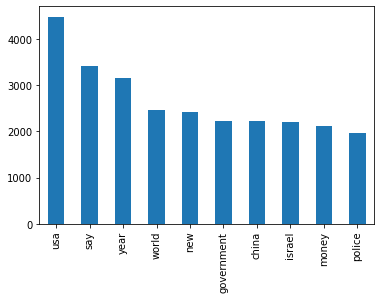

In [122]:
pd.Series(sent).value_counts().head(10).plot(kind = "bar")

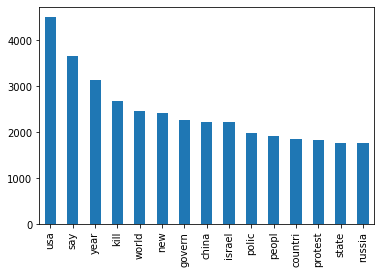

In [11]:
pd.Series(sent).value_counts().head(15).plot(kind = "bar")

In [12]:
display(RedditNews[RedditNews['News'].str.contains(' says ')].reset_index().iloc[7]["News"])


'Pope says Church should ask forgiveness from gays for past treatment'

In [13]:
lemacorpus = [lemmatizer.lemmatize(word) for word in corpus.split(" ")]
tokens = re.split(r"\W+"," ".join(lemacorpus))
print("hay",len(tokens),"tokens")


hay 598892 tokens
